In [1]:
import numpy as np
import pandas as pd

In [2]:
titanic = pd.read_csv("Dataset/Titanic.csv")
print(titanic.shape)
sur = titanic["Survived"]
titanic.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.drop(['Survived'], axis=1)
titanic = titanic.drop(['PassengerId'], axis=1)
print(titanic.shape)
titanic.head()

(891, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic["Survived"] = sur
print(titanic.shape)
titanic.head()

(891, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
X = titanic.iloc[:,0:titanic.shape[1]-1]
Y = titanic.iloc[:,-1]
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, random_state=123211)
print(type(X_train))
print(type(Y_train))
print(type(Y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [7]:
X_Y_train = X_train.copy()
X_Y_train['Survived'] = Y_train
print(X_Y_train.shape)
print(X_test.shape)
print(Y_train.shape)
X_Y_train.to_csv('titanic_x_y_train.csv', index=False)
X_train.to_csv('titanic_x_train.csv', index=False)
Y_train.to_csv('titanic_y_train.csv', index=False)
X_test.to_csv('titanic_x_test.csv', index=False)
Y_test.to_csv('titanic_y_test.csv', index=False)

(668, 11)
(223, 10)
(668,)


In [8]:
X_Y_train_l = pd.read_csv('titanic_x_y_train.csv', delimiter=',')
X_test_l = pd.read_csv('titanic_x_test.csv', delimiter=',')
print(X_Y_train_l.shape)
X_Y_train_l.isnull().sum()

#X_Y_train_l.head()

(668, 11)


Pclass        0
Name          0
Sex           0
Age         141
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       518
Embarked      1
Survived      0
dtype: int64

In [9]:
del X_Y_train_l["Name"]
del X_Y_train_l["Ticket"]
del X_Y_train_l["Cabin"]
del X_Y_train_l["Fare"]
X_Y_train_l.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,2,male,62.0,0,0,S,1
1,2,female,28.0,0,0,S,1
2,3,male,30.0,1,0,S,0
3,3,male,19.0,0,0,S,0
4,3,male,31.0,0,0,Q,0


In [10]:
del X_test_l["Name"]
del X_test_l["Ticket"]
del X_test_l["Cabin"]
del X_test_l["Fare"]

In [11]:
print(X_Y_train_l.isnull().sum())
print(X_Y_train_l.shape)
#X_Y_train_l.dropna(inplace=True)
X_Y_train_l = X_Y_train_l.fillna(X_Y_train_l.median())
print(X_Y_train_l.isnull().sum())
X_Y_train_l.shape

Pclass        0
Sex           0
Age         141
SibSp         0
Parch         0
Embarked      1
Survived      0
dtype: int64
(668, 7)
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    1
Survived    0
dtype: int64


C:\Users\yashw\AppData\Local\Temp\ipykernel_11960\73343569.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_Y_train_l = X_Y_train_l.fillna(X_Y_train_l.median())


(668, 7)

In [12]:
X_Y_train_l.dropna(inplace=True)
print(X_Y_train_l.isnull().sum())
X_Y_train_l.shape

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
Survived    0
dtype: int64


(667, 7)

In [13]:
X_train_l = X_Y_train_l.iloc[:,:X_Y_train_l.shape[1]-1]
print(X_train_l.shape)
Y_train_l = X_Y_train_l.iloc[:,-1]
print(Y_train_l.shape)
print(Y_train_l)

(667, 6)
(667,)
0      1
1      1
2      0
3      0
4      0
      ..
663    1
664    0
665    0
666    1
667    0
Name: Survived, Length: 667, dtype: int64


In [14]:
def getNumber(str):
    if str=="male":
        return 1
    else:
        return 2
X_train_l['gender']=X_train_l["Sex"].apply(getNumber)
print(X_train_l)
del X_train_l["Sex"]
X_train_l.head()

     Pclass     Sex   Age  SibSp  Parch Embarked  gender
0         2    male  62.0      0      0        S       1
1         2  female  28.0      0      0        S       2
2         3    male  30.0      1      0        S       1
3         3    male  19.0      0      0        S       1
4         3    male  31.0      0      0        Q       1
..      ...     ...   ...    ...    ...      ...     ...
663       3    male  21.0      0      0        S       1
664       3  female  28.0      0      0        Q       2
665       1    male  28.0      0      0        S       1
666       1    male  28.0      0      0        S       1
667       3  female  14.0      0      0        S       2

[667 rows x 7 columns]


,Pclass,Age,SibSp,Parch,Embarked,gender
0,2,62.0,0,0,S,1
1,2,28.0,0,0,S,2
2,3,30.0,1,0,S,1
3,3,19.0,0,0,S,1
4,3,31.0,0,0,Q,1


In [15]:
X_test_l['gender']=X_test_l["Sex"].apply(getNumber)
print(X_test_l)
del X_test_l["Sex"]
X_test_l.head()

     Pclass     Sex   Age  SibSp  Parch Embarked  gender
0         1    male  34.0      0      0        S       1
1         1    male  40.0      0      0        C       1
2         1  female  52.0      1      0        C       2
3         3    male  24.0      0      0        S       1
4         2    male  31.0      1      1        C       1
..      ...     ...   ...    ...    ...      ...     ...
218       1    male  27.0      1      0        S       1
219       3    male   NaN      0      0        S       1
220       3    male  21.0      0      0        S       1
221       2  female   NaN      0      0        Q       2
222       3    male  27.0      1      0        C       1

[223 rows x 7 columns]


,Pclass,Age,SibSp,Parch,Embarked,gender
0,1,34.0,0,0,S,1
1,1,40.0,0,0,C,1
2,1,52.0,1,0,C,2
3,3,24.0,0,0,S,1
4,2,31.0,1,1,C,1


In [16]:
def getNumberEmbarked(str):
    if str=='C':
        return 1
    elif str=='Q':
        return 2
    else:
        return 3
X_train_l['Embarked'] = X_train_l['Embarked'].apply(getNumberEmbarked)
print(X_train_l)

     Pclass   Age  SibSp  Parch  Embarked  gender
0         2  62.0      0      0         3       1
1         2  28.0      0      0         3       2
2         3  30.0      1      0         3       1
3         3  19.0      0      0         3       1
4         3  31.0      0      0         2       1
..      ...   ...    ...    ...       ...     ...
663       3  21.0      0      0         3       1
664       3  28.0      0      0         2       2
665       1  28.0      0      0         3       1
666       1  28.0      0      0         3       1
667       3  14.0      0      0         3       2

[667 rows x 6 columns]


In [17]:
X_test_l['Embarked']=X_test_l["Embarked"].apply(getNumberEmbarked)
print(X_test_l)

     Pclass   Age  SibSp  Parch  Embarked  gender
0         1  34.0      0      0         3       1
1         1  40.0      0      0         1       1
2         1  52.0      1      0         1       2
3         3  24.0      0      0         3       1
4         2  31.0      1      1         1       1
..      ...   ...    ...    ...       ...     ...
218       1  27.0      1      0         3       1
219       3   NaN      0      0         3       1
220       3  21.0      0      0         3       1
221       2   NaN      0      0         2       2
222       3  27.0      1      0         1       1

[223 rows x 6 columns]


In [18]:
print(X_test_l.isnull().sum())
X_test_l = X_test_l.fillna(X_test_l.median())
X_test_l.isnull().sum()

Pclass       0
Age         36
SibSp        0
Parch        0
Embarked     0
gender       0
dtype: int64


Pclass      0
Age         0
SibSp       0
Parch       0
Embarked    0
gender      0
dtype: int64

In [19]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_l, Y_train_l)
Y_pred_l = clf.predict(X_test_l)
clf.score(X_train_l,Y_train_l), clf.score(X_test_l,Y_test)

(0.9460269865067467, 0.7219730941704036)

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 6, random_state=0)
clf.fit(X_train_l, Y_train_l)
clf.score(X_train_l,Y_train_l),clf.score(X_test_l,Y_test)

(0.863568215892054, 0.7623318385650224)

# Random Forest implementation on digits data

In [21]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [22]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

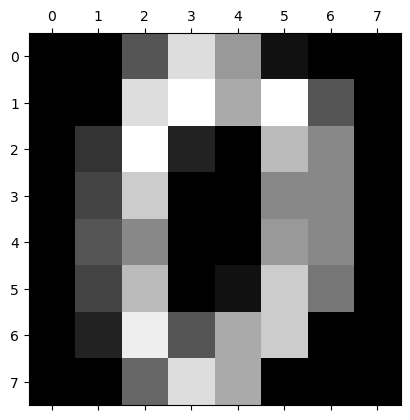

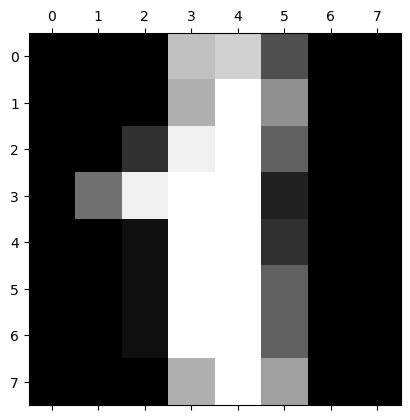

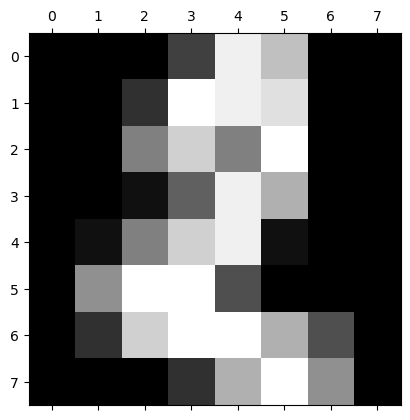

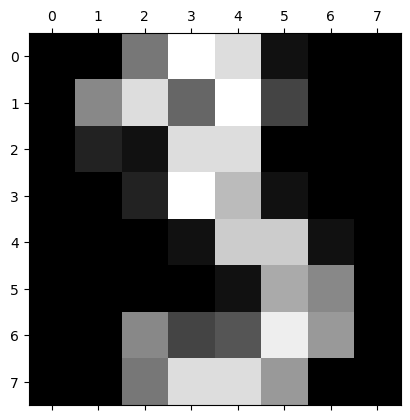

In [24]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i]) 

In [26]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [27]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [28]:
df.shape

(1797, 65)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),df['target'])

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
model_arguments = rfc.get_params()
# Print the arguments
for arg, value in model_arguments.items():
    print(f"{arg}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [58]:
rfc.score(x_test,y_test)

0.9666666666666667

In [38]:
y_test_pred = rfc.predict(x_test)

In [40]:
from sklearn.metrics import confusion_matrix

In [59]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  1],
       [ 0,  0,  0,  1,  1, 56,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 32]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

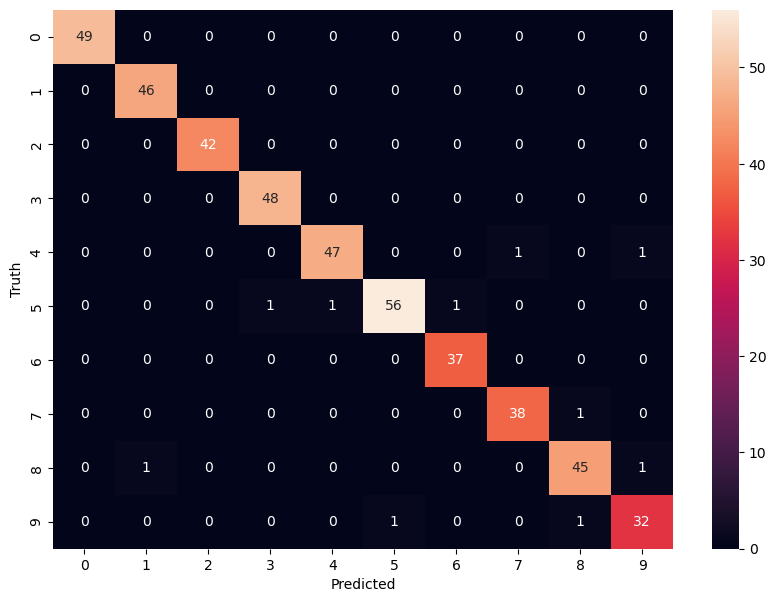

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# random forest on irirs dataset

In [63]:
from sklearn.datasets import load_iris

In [70]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [74]:
df = pd.DataFrame(iris.data , columns=iris.feature_names)

In [77]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [79]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target"],axis="columns") , df['target'])

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rfc = RandomForestClassifier(n_estimators = 10)

In [82]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [83]:
rfc.score(x_test,y_test)

0.9736842105263158

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
cm = confusion_matrix(y_test,rfc.predict(x_test))
cm

array([[11,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

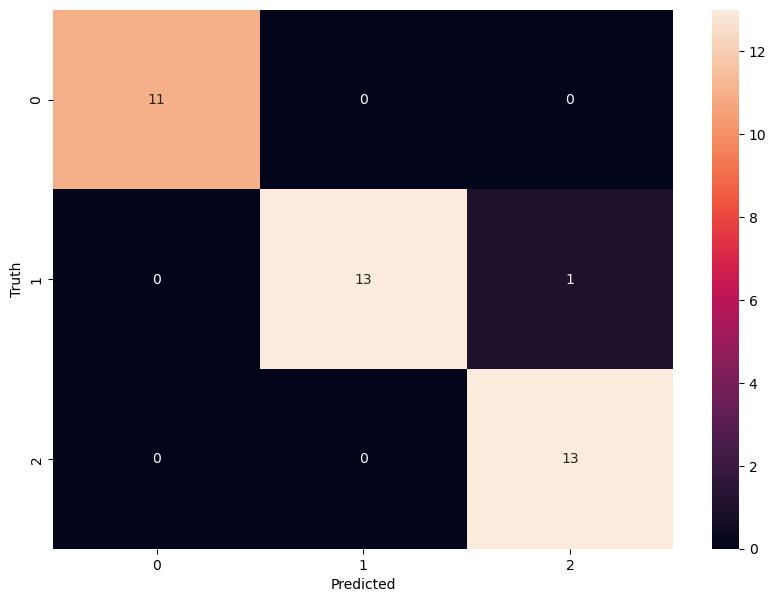

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')